In [1]:
from keras.datasets import imdb #리뷰 데이터
(X_data, y_data),(tt_x, tt_y)=imdb.load_data(num_words = 500)
#가장 많이 등장한 500종의 단어만 남기려는 parameter
#그러다 비어있는 데이터가 등장할 수도 있다.

In [2]:
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y=train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [3]:
from keras.preprocessing.sequence import pad_sequences #원하는 사이즈로 자르는 도구
#기본값이 max padding
#각 원소가 가장 긴 길이를 가진 원소만큼의 길이로 원소를 가짐. 비어있는 부분은 0으로
#보통 뒤쪽의 데이터가 더 중요하다고 생각하므로(보통의 문장들이 미괄식.) 뒤쪽 데이터를 살리는 방향으로 데이터를 자르거나 늘린다
ck_t_x = pad_sequences(t_x, maxlen=100)
ck_v_x = pad_sequences(v_x, maxlen=100)

In [4]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, LSTM
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

m=Sequential()
m.add(Embedding(500, 16, input_length=100)) #vacabrary의 수 500개의 단어를 16개 차원으로 만든다. 알아서 해줌
m.add(LSTM(8)) 
m.add(Dense(1,activation = 'sigmoid'))
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
m.compile(loss = 'binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(patience = 3, restore_best_weights=True)
ck = ModelCheckpoint('m.h5')

In [6]:
hy = m.fit(ck_t_x, t_y, validation_data = [ck_v_x, v_y], callbacks = [es, ck], batch_size=64, epochs=100)

Epoch 1/100
313/313 [==============================] - 15s 42ms/step - loss: 0.5828 - accuracy: 0.6908 - val_loss: 0.5071 - val_accuracy: 0.7510
Epoch 2/100
313/313 [==============================] - 20s 64ms/step - loss: 0.4569 - accuracy: 0.7883 - val_loss: 0.4490 - val_accuracy: 0.7934
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.4376 - accuracy: 0.7993 - val_loss: 0.4573 - val_accuracy: 0.7822
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.4277 - accuracy: 0.8055 - val_loss: 0.4349 - val_accuracy: 0.8014
Epoch 5/100
313/313 [==============================] - 13s 43ms/step - loss: 0.4228 - accuracy: 0.8052 - val_loss: 0.4314 - val_accuracy: 0.8016
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.4186 - accuracy: 0.8066 - val_loss: 0.4291 - val_accuracy: 0.7984
Epoch 7/100
313/313 [==============================] - 13s 40ms/step - loss: 0.4145 - accuracy: 0.8065 - val_loss: 0.4288 - val_ac

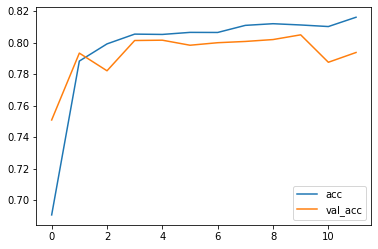

In [7]:
import matplotlib.pyplot as plt
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

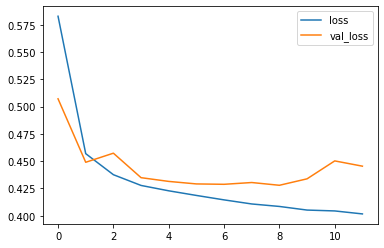

In [8]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [9]:

m1=Sequential()
m1.add(Embedding(500, 16, input_length=100)) 
m1.add(LSTM(8,dropout=0.3)) 
m1.add(Dense(1,activation = 'sigmoid'))
m1.compile(loss = 'binary_crossentropy', metrics=['accuracy'])
es = EarlyStopping(patience = 3, restore_best_weights=True)
ck = ModelCheckpoint('m.h5')
m1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [10]:
hy1 = m1.fit(ck_t_x, t_y, validation_data = [ck_v_x, v_y], callbacks = [es, ck], batch_size=64, epochs=100)

Epoch 1/100
313/313 [==============================] - 23s 66ms/step - loss: 0.6322 - accuracy: 0.6669 - val_loss: 0.5618 - val_accuracy: 0.7484
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5112 - accuracy: 0.7702 - val_loss: 0.4577 - val_accuracy: 0.7950
Epoch 3/100
313/313 [==============================] - 14s 43ms/step - loss: 0.4533 - accuracy: 0.7921 - val_loss: 0.4440 - val_accuracy: 0.7954
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4346 - accuracy: 0.8006 - val_loss: 0.4296 - val_accuracy: 0.8050
Epoch 5/100
313/313 [==============================] - 14s 43ms/step - loss: 0.4270 - accuracy: 0.8052 - val_loss: 0.4260 - val_accuracy: 0.7996
Epoch 6/100
313/313 [==============================] - 14s 43ms/step - loss: 0.4237 - accuracy: 0.8036 - val_loss: 0.4363 - val_accuracy: 0.7962
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4214 - accuracy: 0.8055 - val_loss: 0.4236 - val_ac

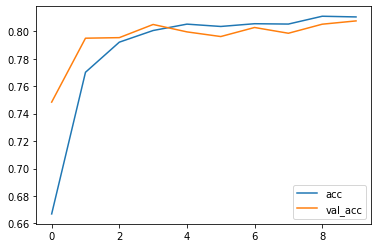

In [11]:
plt.plot(hy1.history['accuracy'])
plt.plot(hy1.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.show()

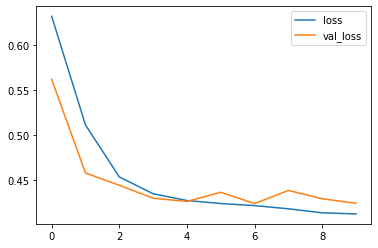

In [12]:
plt.plot(hy1.history['loss'])
plt.plot(hy1.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [14]:
del m2

In [13]:
m2=Sequential()
m2.add(Embedding(500, 16, input_length=100)) 
m2.add(LSTM(8,dropout=0.3, return_sequences=True))  #레이어를 지나온 값은 원래 시퀀스 값이 아니다. 그걸 다시 시퀀스로 바꿔주는 파라미터
m2.add(LSTM(8,dropout=0.3))
m2.add(Dense(1,activation = 'sigmoid'))
m2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(patience = 3, restore_best_weights=True)
ck = ModelCheckpoint('m.h5')
m2.compile(loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
hy2 = m2.fit(ck_t_x, t_y, validation_data = [ck_v_x, v_y], callbacks = [es, ck], batch_size=64, epochs=100)

In [ ]:
from keras.layers import GRU
m3=Sequential()
m3.add(Embedding(500, 16, input_length=100)) 
m3.add(GRU(8,dropout=0.3, return_sequences=True))  #레이어를 지나온 값은 원래 시퀀스 값이 아니다. 그걸 다시 시퀀스로 바꿔주는 파라미터
m3.add(GRU(8,dropout=0.3)) #일반적으로 LSTM과의 차이는 크게 없지만 보통 LSTM을 씀
m3.add(Dense(1,activation = 'sigmoid'))
m3.summary()